### Importaciones de dependencias

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Leer el dataframe

In [28]:
df = pd.read_csv('asteroid.csv')

df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16352\1711445433.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('asteroid.csv')


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


### Generar la columna id

In [29]:
df["id"] = range(1, len(df) + 1)

### Tomamos las columnas de interés

In [30]:
df = df[['id', 'name', 'neo', 'H', 'e', 'a', 'q', 'i', 'tp', 'moid_ld']]
df = df.rename(columns={
    'H': 'absolute_magnitude',
    'e': 'eccentricity',
    'a': 'semimajor_axis',
    'q': 'perihelion',
    'i': 'inclination',
    'tp': 'time_perihelion',
})

df.head()

,id,name,neo,absolute_magnitude,eccentricity,semimajor_axis,perihelion,inclination,time_perihelion,moid_ld
0,1,Ceres,N,3.40,0.076009,2.769165,2.558684,10.594067,2.458239e+06,620.640533
1,2,Pallas,N,4.20,0.229972,2.773841,2.135935,34.832932,2.458321e+06,480.348639
2,3,Juno,N,5.33,0.256936,2.668285,1.982706,12.991043,2.458446e+06,402.514639
3,4,Vesta,N,3.00,0.088721,2.361418,2.151909,7.141771,2.458248e+06,443.451432
4,5,Astraea,N,6.90,0.190913,2.574037,2.082619,5.367427,2.458926e+06,426.433027


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  958524 non-null  int64  
 1   name                22064 non-null   object 
 2   neo                 958520 non-null  object 
 3   absolute_magnitude  952261 non-null  float64
 4   eccentricity        958524 non-null  float64
 5   semimajor_axis      958524 non-null  float64
 6   perihelion          958524 non-null  float64
 7   inclination         958524 non-null  float64
 8   time_perihelion     958524 non-null  float64
 9   moid_ld             958397 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 73.1+ MB


In [32]:
df.isnull().sum()

id                         0
name                  936460
neo                        4
absolute_magnitude      6263
eccentricity               0
semimajor_axis             0
perihelion                 0
inclination                0
time_perihelion            0
moid_ld                  127
dtype: int64

### Limpieza de datos

In [33]:
df = df.dropna(subset=['absolute_magnitude', 'neo', 'moid_ld'])

df.isnull().sum()

id                         0
name                  930068
neo                        0
absolute_magnitude         0
eccentricity               0
semimajor_axis             0
perihelion                 0
inclination                0
time_perihelion            0
moid_ld                    0
dtype: int64

### Creacion de la columna para el entrenamiento

In [34]:
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})

### Entrenamiento del modelo

In [35]:
x = df[['absolute_magnitude', 'eccentricity', 'semimajor_axis', 'perihelion', 'inclination', 'time_perihelion', 'moid_ld']]
y = df['neo']

model = LogisticRegression(max_iter=5000)

model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


### Prediccion

In [36]:
neo_positive = np.array([[22.1, 0.45, 1.1, 0.85, 6.4, 2459400.0, 0.02]])
neo_negative = np.array([[18.3, 0.07, 3.2, 2.95, 18.7, 2459500.0, 1.85]])

columns = ['absolute_magnitude', 'eccentricity', 'semimajor_axis', 'perihelion', 'inclination', 'time_perihelion', 'moid_ld']

neo_positive_df = pd.DataFrame(neo_positive, columns=columns)
neo_negative_df = pd.DataFrame(neo_negative, columns=columns)

print("NEO positivo:", model.predict(neo_positive_df)[0])
print("NEO negativo:", model.predict(neo_negative_df)[0])

print("Probabilidades positivas:", model.predict_proba(neo_positive_df)[0])
print("Probabilidades negativas:", model.predict_proba(neo_negative_df)[0])

NEO positivo: 1
NEO negativo: 0
Probabilidades positivas: [0.02171379 0.97828621]
Probabilidades negativas: [0.74769551 0.25230449]


### Guardar el modelo

In [37]:
jl.dump(model, 'asteroid_model.pkl')

['asteroid_model.pkl']

### Graficar los resultados

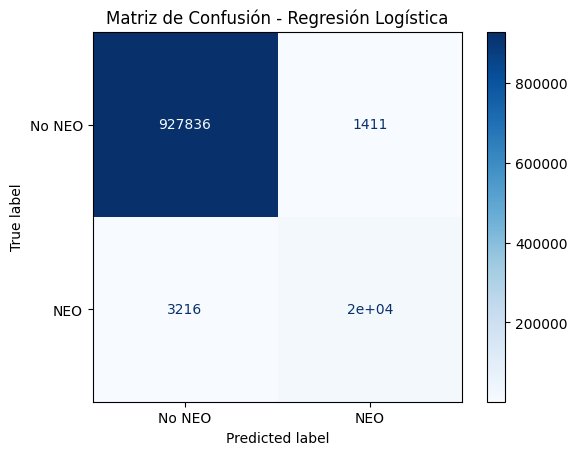

In [38]:
y_pred = model.predict(x)

cm = confusion_matrix(y, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No NEO", "NEO"])
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Regresión Logística")
plt.show()